# Practical Lab: Linear Regression by using the gradient descent algorithm

## Utils

In [75]:
from sklearn import datasets # data
import os # directory management
import pandas as pd # data analysis
from scipy import stats # descriptive statistics
import matplotlib.pyplot as plt # figures
import numpy as np # maths
import seaborn as sns

## Data

In [76]:
#-- Reading the (training) data in a data frame
path=r"C:\Users\Admin\OneDrive - Université Bretagne Sud\CLASSES\MACHINE LEARNING\Linear regression\pm25_train_data.csv"
training=pd.read_csv(path, sep=";")
#training.head
training.columns

Index(['PM2.5', 'SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure',
       'dew point', 'rainfall', 'windspeed'],
      dtype='object')

In [77]:
training.head()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,24.0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,93.0,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,117.0,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,58.0,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,226.0,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3


### Analyse and select the data to be studied

In [78]:
#-- Display some statistics on the data by using the describe function on the dataframe
training.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11918.000000,11667.000000,11636.000000,11462.000000,11677.000000,11898.000000,11898.000000,11898.000000,11898.000000,11900.000000
mean,144.962326,21.960768,44.788865,1165.367650,73.894402,17.924920,1009.787557,2.765969,0.047630,2.243664
std,103.807565,27.065010,33.186310,1019.736671,51.840188,10.751675,10.074917,13.483896,0.532651,1.346997
min,3.000000,0.571200,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.300000,0.000000,1.300000
50%,120.000000,12.000000,37.000000,900.000000,66.000000,19.900000,1009.400000,3.100000,0.000000,1.900000
75%,192.000000,29.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [79]:
#Clean up the data to remove the null values as noted in the count of a number of variables
training=training.dropna()
training.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,144.785609,21.803471,44.614596,1165.918100,74.123981,17.943513,1009.810802,2.826747,0.046918,2.235968
std,102.926739,26.880259,32.895568,1010.439512,51.904421,10.751609,10.075603,13.450111,0.535652,1.337821
min,3.000000,0.856800,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.200000,0.000000,1.300000
50%,120.000000,12.000000,36.000000,900.000000,66.000000,20.000000,1009.300000,3.100000,0.000000,1.900000
75%,192.000000,28.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [80]:
#-- Save the explanatory variables in a variable X (and their names in a varaible feature_names), and the target variable in Y
feature_names=training.columns[1:]
print(feature_names)

Index(['SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure', 'dew point',
       'rainfall', 'windspeed'],
      dtype='object')


In [81]:
X=training.iloc[1:,1:].values
print(X)

[[ 2.50e+01  7.60e+01  9.00e+02 ... -1.64e+01  0.00e+00  2.70e+00]
 [ 7.70e+01  9.90e+01  1.60e+03 ... -1.33e+01  0.00e+00  1.10e+00]
 [ 1.20e+01  1.40e+01  4.00e+02 ... -1.39e+01  0.00e+00  2.70e+00]
 ...
 [ 4.60e+01  9.90e+01  3.00e+03 ... -7.10e+00  0.00e+00  1.30e+00]
 [ 7.00e+00  1.50e+01  5.00e+02 ... -1.08e+01  0.00e+00  4.10e+00]
 [ 1.20e+01  5.40e+01  1.20e+03 ... -1.03e+01  0.00e+00  1.30e+00]]


In [82]:

Y=training['PM2.5'].values
print(Y)

[ 24.  93. 117. ... 543. 505. 227.]


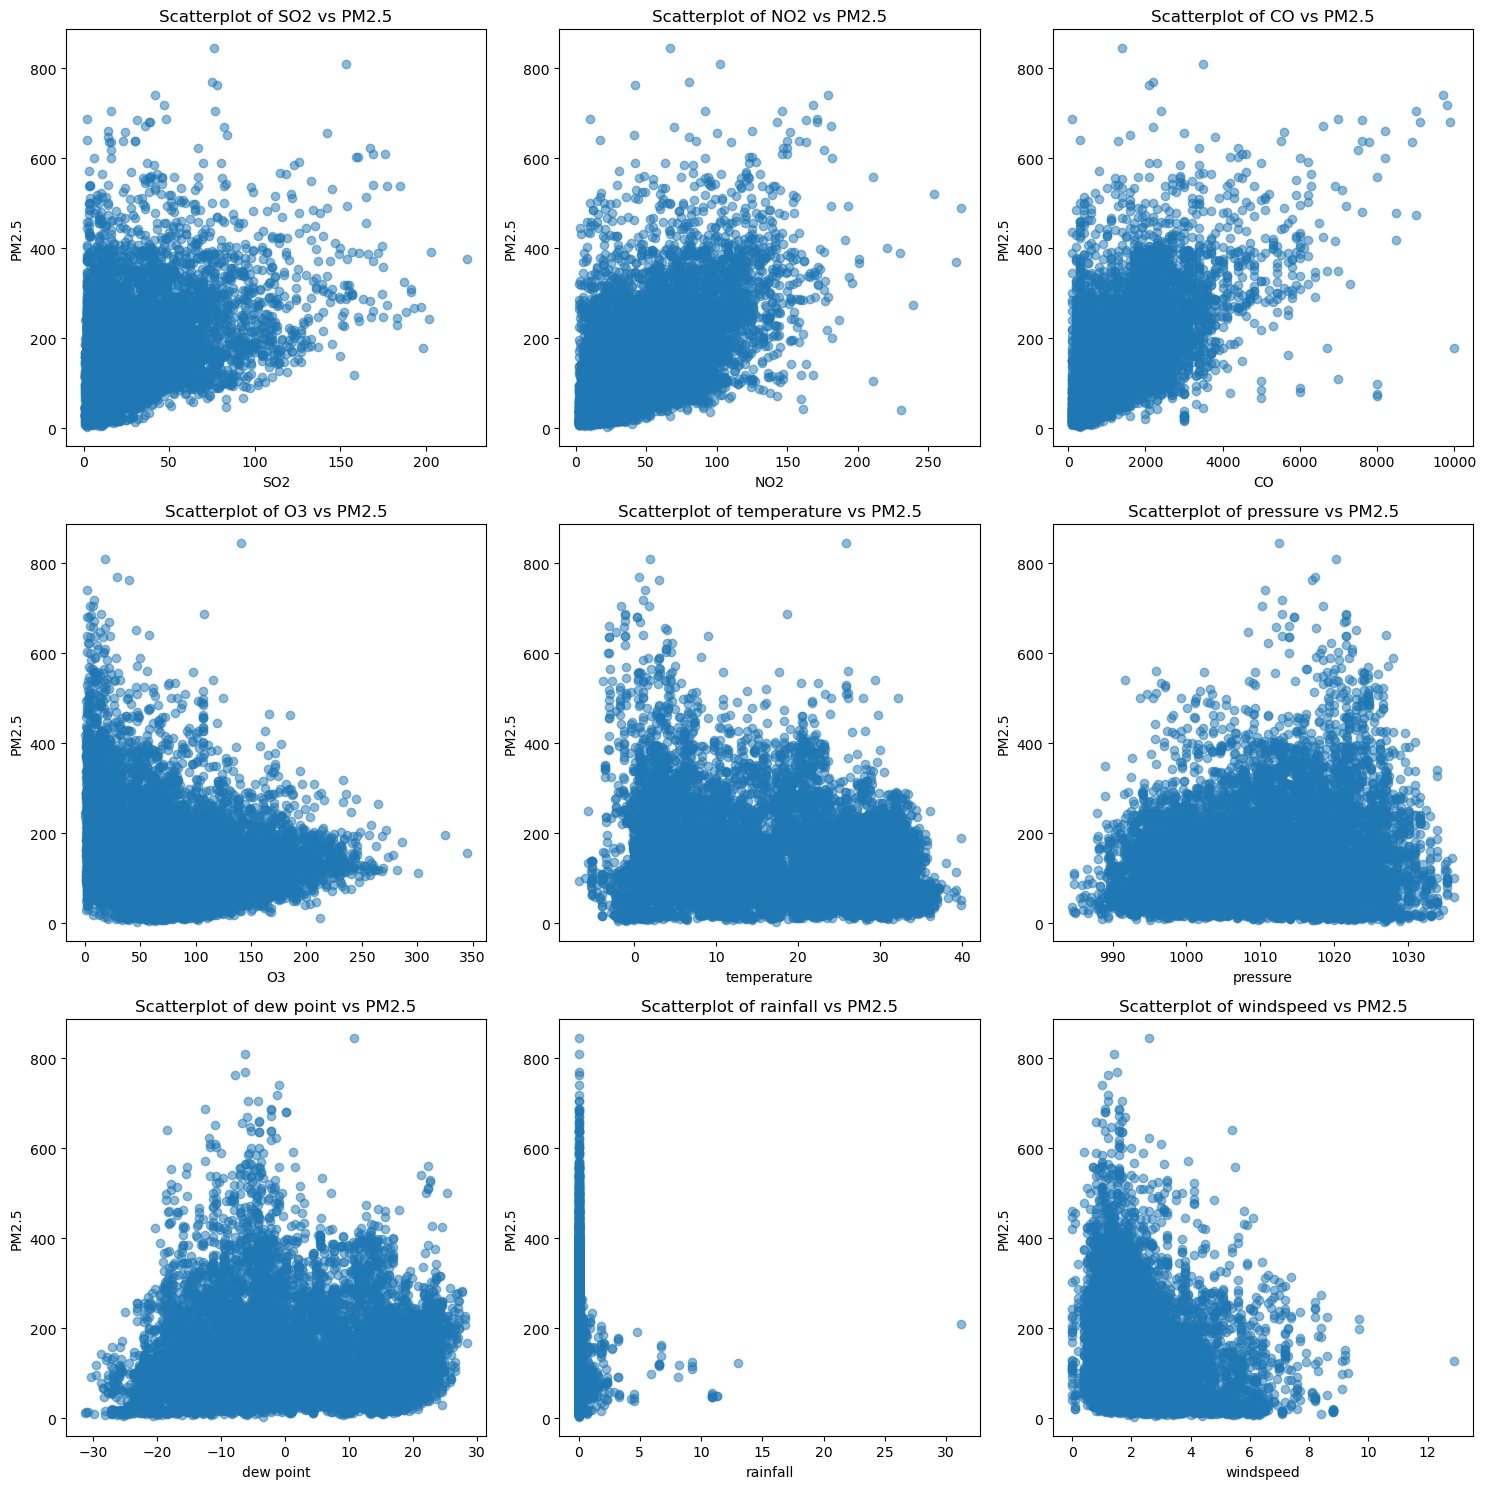

In [83]:

explanatory_variables = feature_names
dependent_variable = "PM2.5"

# Create a figure with subplots
plt.figure(figsize=(15,15))

# Scatterplots for each explanatory variable
for i, var in enumerate(explanatory_variables):
    plt.subplot(331 + i)  # Create subplots in a 1x3 grid (adjust as needed)
    plt.scatter(training[var], training[dependent_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {var} vs {dependent_variable}')

# Show the plots
plt.tight_layout()
plt.show()


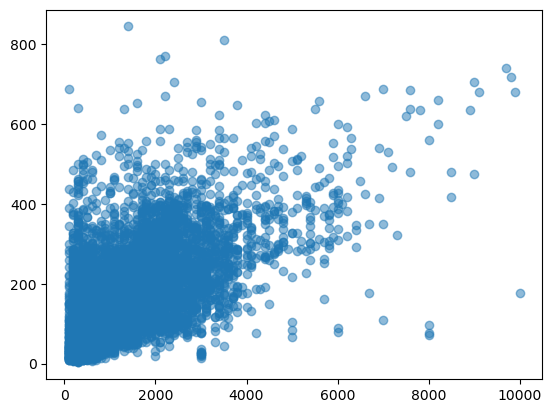

In [84]:
#-- Select the explanatory variables for the simple linear regression
explanatory_variable_linear="CO"
plt.scatter(training[explanatory_variable_linear], training[dependent_variable], alpha=0.5)
plt.show()

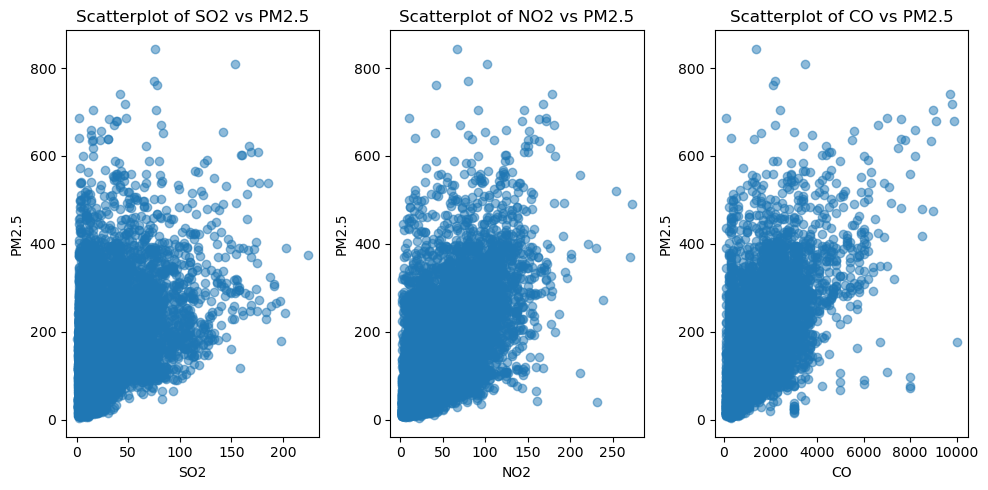

In [85]:
#-- Select the explanatory variables for the multiple linear regression, and display the scatter plots
explanatory_variables_multi = ["SO2","NO2","CO"]

# Create a figure with subplots
plt.figure(figsize=(10,5))

# Scatterplots for each explanatory variable
for i, var in enumerate(explanatory_variables_multi):
    plt.subplot(131 + i)  # Create subplots in a 1x3 grid (adjust as needed)
    plt.scatter(training[var], training[dependent_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {var} vs {dependent_variable}')

# Show the plots
plt.tight_layout()
plt.show()




In [86]:
#-- Extract the data and creates two X matrices that will be used for the regression
#---- Xs for simple lin reg and Xm for multiple lin reg

X_multi=training[explanatory_variables_multi].values
X_simple=training[explanatory_variable_linear].values.reshape(-1, 1)
#-- Check the size of both matrices
print(X_multi.shape,X_simple.shape)




(11160, 3) (11160, 1)


As noted at X.describe, the data scale for the variables is differny hence we normalise: (X-Xbar)/standard deviation

In [87]:
#--- Write the standardisation function to mean-center the X data
def standardisation(X):
    return (X-np.mean(X))/np.std(X, ddof=1)

    
    
#-- Test 1 - simple lin reg
#print(type(Xs))
Xs_normalised=standardisation(X_simple)
#-- Test 2 - multiple lin reg
Xm_normalised=standardisation(X_multi)




In [88]:
#-- Preparing the matrix to be used for the gradient descent algorithm
#by adding the ones columns such that b0 will be multiplied by one. Hint:use stack/hstack/vstack
ones=np.ones(len(Xs_normalised))
Xs=np.column_stack((ones,Xs_normalised))
Xm=np.column_stack((ones,Xm_normalised))

#-- Test 1 - simple lin reg
print("Simple Regression:",Xs)

#-- Test 2 - multiple lin reg
print("Multiple Regression:",Xm)



Simple Regression: [[ 1.         -0.85697173]
 [ 1.         -0.26317073]
 [ 1.          0.42959712]
 ...
 [ 1.          1.8151328 ]
 [ 1.         -0.65903806]
 [ 1.          0.03372978]]
Multiple Regression: [[ 1.         -0.51028573 -0.50270308 -0.13999946]
 [ 1.         -0.48753777 -0.42308521  0.61826595]
 [ 1.         -0.42182143 -0.39401837  1.50290893]
 ...
 [ 1.         -0.46099848 -0.39401837  3.27219489]
 [ 1.         -0.51028573 -0.50017553  0.11275568]
 [ 1.         -0.50396685 -0.45088827  0.99739866]]


## Least squares or maximum likelihood solution

In [89]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#-- Formulae recall: (X^T X)^-1 X^T Y
def coef_ml(X,Y):
    X_T=np.transpose(X)
    return np.dot(np.dot(np.linalg.inv(np.dot(X_T,X)),X_T),Y)

    
    
#-- Test 1  - simple reg
Beta_lin=coef_ml(Xs,Y)
print(Beta_lin)
#-- Test 2 - multiple reg
beta_mul=coef_ml(Xm,Y)
print(beta_mul)
#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

[144.78560932  65.52805564]
[479.2297854  297.2614913  478.58250308  34.73296812]


## Gradient descent algorithm

In the following, we will implement several functions to apply linear regression.
These functions should be **generic** and work for any number of explanatory variables. You should be able to apply them to Xs and Xm standardized variables. 

WARNING: parameters of the functions needs to be completed

To test my understanding of the concept of gradient descent algorithm, I tried the implementation on a simple linear regression
yhat=b0+b1*xi
sum of squared residuals=np.sum(yi-yhat)**2
loss=(1/m)*sum of squared residuals where m is x.shape[0]
gradient descent function would be denoted as new parameter=former parameter-(learning_rate)*(1/m)*partail derivative of the sum of squared residauls with respect to the parameters

In [90]:

#define the gradient descent function
def gradient_desc(b0,b1,x,y,learning_rate):
    dldb0=0
    dldb1=0
    m=x.shape[0]
    initial_loss=np.mean((y - (b0 + b1 * x)) ** 2)


    for iteration in range(max_iterations):
        for xi,yi in zip(x,y):
            #parial derivatives of the mean squared residuals using the chain rule concept
            dldb0 += -2*(yi-(b0+b1*xi))
            dldb1 += 2*xi*(yi-(b0+b1*xi))
        

            #update th values of b0 and b1 iteratively
        b0=b0-learning_rate*(1/m)*dldb0
        b1=b1-learning_rate*(1/m)*dldb1

        current_loss=np.mean((y - (b0 + b1 * x)) ** 2)
        # Check for convergence
        if abs(initial_loss - current_loss) < convergence_threshold:
            print(f"Converged after {iteration} iterations")
            break

        initial_loss = current_loss

    return b0,b1



In [91]:
#initialise the parameters
b0=0
b1=0
learning_rate=0.1
max_iterations=1000
convergence_threshold=1e-6

#-- Test on a small dataset
x_test = np.random.rand(10,1)
y_test = 2*x_test+np.random.rand()


B0,B1=gradient_desc(b0,b1,x_test,y_test,learning_rate)
print(f' parameters are B0:{B0} and B1:{B1}')
    

 parameters are B0:[8.11921886e+55] and B1:[-1.98319275e+56]


In [92]:

betas_s=[1,2]
betas_m=[1,2,3,4]
#-- Model
def f(X,betas):
    Yhat=np.dot(X,betas)
    return Yhat

#-- Test 1 - simple reg
Yhat_s=f(Xs,betas_s)
print("Simple regression predictions:",Yhat_s)
#-- Test 2 - multiple reg
Yhat_m=f(Xm,betas_m)
print("Mutli regression predictions:",Yhat_m)


Simple regression predictions: [-0.71394347  0.47365855  1.85919423 ...  4.6302656  -0.31807613
  1.06745955]
Mutli regression predictions: [-2.08867852  1.22873265  4.98593776 ... 11.98472751 -1.07007532
  2.62899611]


In [93]:
#-- Cost function
def cost(Y,Yhat):
    m=Y.shape[0]
    return 1/m*np.sum((Yhat-Y)**2)

#-- Test 1 - simple reg
cost_s=cost(Yhat_s,Y)
print("The cost:Simple regression is",cost_s)
#-- Test 2 - multiple reg
cost_m=cost(Yhat_m,Y)
print("The cost:Multi regression is",cost_m)


The cost:Simple regression is 31009.17662441931
The cost:Multi regression is 30190.207845189554


In [94]:
#-- Computation of the gradient
def grad(X,Y,Yhat):
    m=X.shape[0]
    return 1/m*np.dot((Yhat-Y),X)

#-- Test 1 - simple reg
grad_s=grad(Xs,Y,Yhat_s)
print("The gradient:Multi regression is",grad_s)


#-- Test 2 - multiple reg
grad_m=grad(Xm,Y,Yhat_m)
print("The gradient:Multi regression is",grad_m)


The gradient:Multi regression is [-143.78560932  -63.52236316]
The gradient:Multi regression is [-142.33970507   68.38793866   63.58172284 -212.81314925]


In [95]:
#-- Gradient descent algorithm
# Function for gradient descent with convergence measure
def grad_descent(X, Y, betas, learning_rate, epochs, tolerance):
    betas_list = []
    cost_list = []

    prev_loss = float('inf')

    for epoch in range(epochs):
        Yhat = f(X, betas)
        loss = cost(Y, Yhat)
        cost_list.append(loss)

        gradient = grad(X, Y, Yhat)
        betas =betas - learning_rate * gradient
        betas_list.append(betas)

        if abs(prev_loss - loss) < tolerance:
            print(f"Converged after {epoch + 1} epochs.")
            break

        prev_loss = loss

    return betas_list, cost_list

epochs=10000
convergence_tolerance=1e-5
learning_rate=0.001

#-- Test 1  - simple reg
betas_sinit = np.random.rand(Xs.shape[1])
betas_s,loss_s=grad_descent(Xs,Y,betas_sinit,learning_rate,epochs,convergence_tolerance)
print(f"Betas for simple linear regression: {betas_s}, Loss: {loss_s}")
print(f"Betas at convergence for simple linear regression: {betas_s[-1]}, Loss: {loss_s[-1]}")

#-- Test 2 - multiple reg
betas_minit = np.random.rand(Xm.shape[1])
#print(betas_minit)
betas_m,loss_m=grad_descent(Xm,Y,betas_minit,learning_rate,epochs,convergence_tolerance)
print(f"Betas for multiple linear regression: {betas_m[-1]}, Loss: {loss_s[-1]}")
print(f"Betas at convergence for multiple linear regression: {betas_m[-1]}, Loss: {loss_s[-1]}")


Converged after 7711 epochs.
Betas for simple linear regression: [array([0.89422678, 0.49880414]), array([1.03811816, 0.56382756]), array([1.18186565, 0.62878597]), array([1.32546939, 0.69367942]), array([1.46892953, 0.75850799]), array([1.61224621, 0.82327173]), array([1.75541958, 0.88797072]), array([1.89844977, 0.95260501]), array([2.04133692, 1.01717468]), array([2.1840812 , 1.08167978]), array([2.32668273, 1.14612038]), array([2.46914165, 1.21049654]), array([2.61145812, 1.27480834]), array([2.75363227, 1.33905583]), array([2.89566425, 1.40323908]), array([3.03755419, 1.46735815]), array([3.17930225, 1.53141311]), array([3.32090856, 1.59540401]), array([3.46237326, 1.65933094]), array([3.60369649, 1.72319394]), array([3.7448784 , 1.78699308]), array([3.88591914, 1.85072843]), array([4.02681883, 1.91440006]), array([4.16757762, 1.97800801]), array([4.30819565, 2.04155236]), array([4.44867306, 2.10503318]), array([4.58901   , 2.16845052]), array([4.7292066 , 2.23180445]), array([4.8

An example of the gradient descent algorithm as implemented during the class session

In [96]:
def grad_descent1(X,Y,betas_init,alpha=0.001,eps=1e-5,ITER_MAX=10000):   
    betas_list = []
    betas = betas_init
    betas_list.append(betas)
    Yhat = f(X,betas)
    cost_list = [cost(Y,Yhat)]
    iterk = 0
    difcost = 1+eps
    while (iterk<ITER_MAX and difcost>eps):
        betas = betas - alpha*grad(X,Y,Yhat)
        betas_list.append(betas)
        Yhat = f(X,betas)              
        cost_list.append(cost(Y,Yhat))
        difcost = abs(cost_list[-1] - cost_list[-2])               
        iterk = iterk+1       
    return betas_list,cost_list

In [97]:
#-- Test 1  - simple reg
betas_init = np.random.rand(Xs.shape[1])
betas_s=grad_descent1(Xs,Y,betas_sinit,learning_rate)
print("Betas for the simple linear regression:",betas_s)

#-- Test 2 - multiple reg
betas_init = np.random.rand(Xm.shape[1])
betas_m=grad_descent1(Xm,Y,betas_minit,learning_rate)
print("Betas for the multiple linear regression:",betas_m)

Betas for the simple linear regression: ([array([0.75019136, 0.43371563]), array([0.89422678, 0.49880414]), array([1.03811816, 0.56382756]), array([1.18186565, 0.62878597]), array([1.32546939, 0.69367942]), array([1.46892953, 0.75850799]), array([1.61224621, 0.82327173]), array([1.75541958, 0.88797072]), array([1.89844977, 0.95260501]), array([2.04133692, 1.01717468]), array([2.1840812 , 1.08167978]), array([2.32668273, 1.14612038]), array([2.46914165, 1.21049654]), array([2.61145812, 1.27480834]), array([2.75363227, 1.33905583]), array([2.89566425, 1.40323908]), array([3.03755419, 1.46735815]), array([3.17930225, 1.53141311]), array([3.32090856, 1.59540401]), array([3.46237326, 1.65933094]), array([3.60369649, 1.72319394]), array([3.7448784 , 1.78699308]), array([3.88591914, 1.85072843]), array([4.02681883, 1.91440006]), array([4.16757762, 1.97800801]), array([4.30819565, 2.04155236]), array([4.44867306, 2.10503318]), array([4.58901   , 2.16845052]), array([4.7292066 , 2.23180445]), a

## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

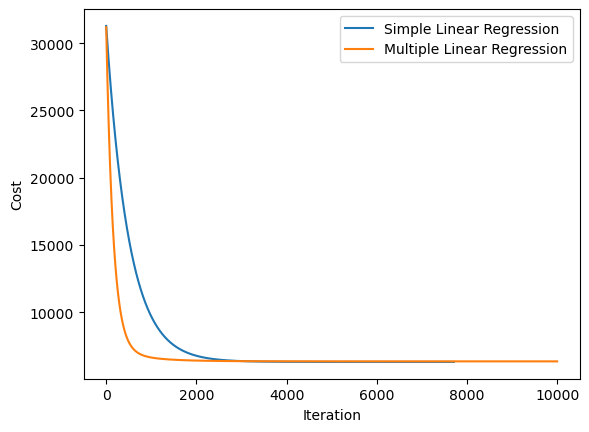

In [98]:
plt.plot(range(len(loss_s)), loss_s, label="Simple Linear Regression")
plt.plot(range(len(loss_m)), loss_m, label="Multiple Linear Regression")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

**Notes:**
The cost function is a convex function i.e it is differentiable twice. This means there is no local minimum, but only the global minimum. Thus gradient descent would converge to the global minimum.


## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

Testing learning rate: 0.1
Converged after 97 epochs.
Testing learning rate: 0.01
Converged after 884 epochs.
Testing learning rate: 0.001
Testing learning rate: 0.0001


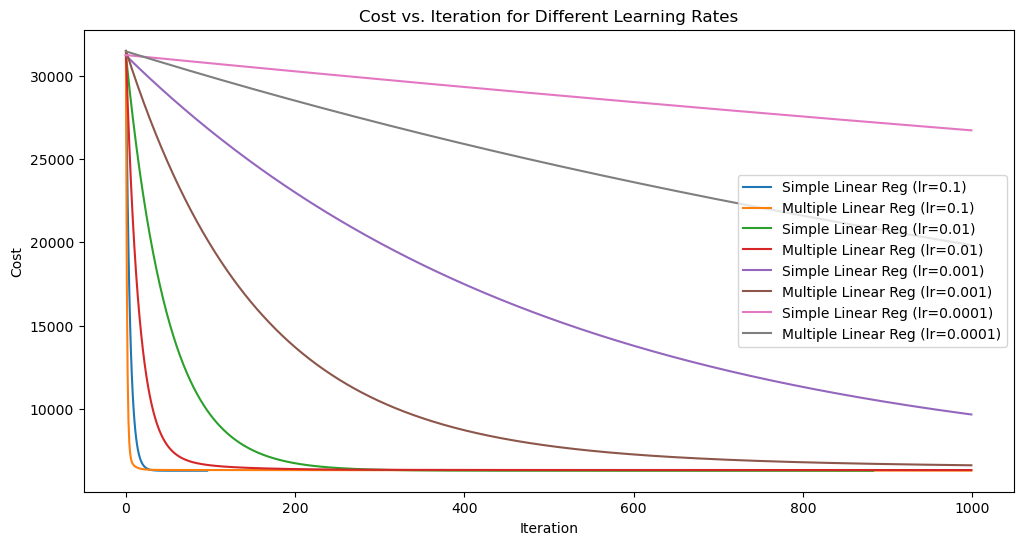

In [100]:
# Define a list of learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Initialize the number of epochs and convergence tolerance
epochs = 1000
convergence_tolerance = 1e-5

# Collect cost values for different learning rates
cost_data = []
parameters=[]

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    
    # Test 1 - simple linear regression
    betas_s_init = np.random.rand(Xs.shape[1])
    betas_s, loss_s = grad_descent(Xs, Y, betas_s_init, lr, epochs, convergence_tolerance)
    cost_data.append((f"Simple Linear Reg (lr={lr})", loss_s))
    parameters.append((f"Simple Linear Reg (lr={lr})", betas_s))

    # Test 2 - multiple linear regression
    betas_m_init = np.random.rand(Xm.shape[1])
    betas_m, loss_m = grad_descent(Xm, Y, betas_m_init, lr, epochs, convergence_tolerance)
    cost_data.append((f"Multiple Linear Reg (lr={lr})", loss_m))
    parameters.append((f"Simple Linear Reg (lr={lr})", betas_m))

   

# Plot cost against iteration for different learning rates
plt.figure(figsize=(12, 6))

for label, cost in cost_data:
    plt.plot(range(len(cost)), cost, label=label)

plt.title("Cost vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()



**Notes:**

## Notes
**on the choice of the stopping criterion:**
Learning Rate and Step Size: The learning rate (often denoted as α or "eta") in gradient descent determines the step size that the algorithm takes during each iteration. It controls how much the algorithm adjusts the model parameters (e.g., the weights or coefficients in a linear regression model) based on the gradient of the cost function. A larger learning rate results in larger steps, while a smaller learning rate leads to smaller steps.


Convergence and Local Optima: When you're using gradient descent to minimize a cost function, the algorithm iteratively approaches a local optima, which is a point where the cost function is at a minimum. The learning rate plays a crucial role in determining how fast the algorithm converges to this minimum. A larger learning rate may lead to quicker convergence, but it can also overshoot the minimum and potentially diverge. A smaller learning rate may lead to slower convergence but is less likely to overshoot.

Stopping at the Local Optima: when the algorithm gets close to a local optima, the gradient becomes smaller. When it reaches the local optima (or is very close to it), the gradient becomes very close to zero. This is because the slope of the cost function at the minimum point is zero. The learning rate should be set such that the algorithm can detect when it's close enough to a minimum and stops iterating. Furthermore, a maximum number of iterations can determine when the iterations should stop. Often times, a combination of both is used.

Impact on Speed and Convergence: The learning rate has a direct impact on how quickly the algorithm runs and converges. A larger learning rate can speed up convergence, but it's more likely to cause oscillations or overshooting. A smaller learning rate can make the algorithm more stable and accurate, but it may require a larger number of iterations to reach the minimum. The choice of an appropriate learning rate often involves a trade-off between speed and stability.

Selecting the right learning rate is a crucial aspect of training machine learning models using gradient-based optimization algorithms like gradient descent. It requires experimentation and sometimes fine-tuning to find the optimal learning rate for a specific problem, balancing the need for fast convergence and stability.




**on the data normalisation:**
Why normalise?
Improves Convergence: Many machine learning algorithms, especially those based on gradient descent, perform better when working with normalized data. Normalization helps the optimization algorithm converge faster because it scales the data into a range where the gradients of the cost function are more consistent, reducing the risk of getting stuck in local optima.

Equalizes the Influence of Features: Features in your dataset may have different scales. Some features may have values in the thousands, while others have values between 0 and 1. This imbalance can cause the model to give disproportionate importance to features with larger scales. Normalization ensures that all features have similar scales, preventing one feature from dominating the others.

Enhances Interpretability: Normalized data is often easier to interpret. For example, when dealing with linear regression, the coefficients associated with each feature become more interpretable when the features are on a similar scale. It makes it easier to compare the impact of different features on the target variable.

Reduces Sensitivity to Outliers: Normalization can reduce the impact of outliers in your dataset. When data is not normalized, extreme values can disproportionately influence the model, causing it to perform poorly. Normalization helps mitigate this issue, making the model more robust to outliers.





**Notes:**

**on gradient descent algorithm**


It is mathematically nice to have a closed form solution like the maximum likelihood solution. This is because it always guarantees the solution, unlike 
the case of gradient descent where the convergence depends on the starting point and the learning rate chosen.
However, for huge volume of data with high dimension (i.e. large number of features), it is easy to implement a solution in a distributed environment for gradient descent, when compared to the closed form solution.
The gradient descent algorithm is easy with convex cost functions



References

https://towardsdatascience.com/understand-convexity-in-optimization-db87653bf920

https://medium.com/p/59670fd5c096

https://towardsdatascience.com/an-overview-of-the-gradient-descent-algorithm-8645c9e4de1e
